In [1]:
#data analysis
import numpy as np
import pandas as pd
import random as rnd

In [2]:
#visualization
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [4]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [5]:
train.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [6]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [10]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [11]:
train.shape

(891, 12)

In [12]:
train['Survived'].value_counts()
#342 survived

0    549
1    342
Name: Survived, dtype: int64

In [13]:
train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [14]:
for col in ['Sex', 'Pclass', 'Embarked']:
    train[col] = train[col].astype('category')

In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null category
Name           891 non-null object
Sex            891 non-null category
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null category
dtypes: category(3), float64(2), int64(4), object(3)
memory usage: 65.7+ KB


In [16]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [17]:
mode = train['Embarked'].value_counts().index[0]
train['Embarked'].fillna(mode, inplace = True)

In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null category
Name           891 non-null object
Sex            891 non-null category
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null category
dtypes: category(3), float64(2), int64(4), object(3)
memory usage: 65.7+ KB


In [19]:
#test data missing values
test.info()

#fare has missing value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [20]:
test['Fare'].value_counts()

#numerical values so we can take mean 

7.7500     21
26.0000    19
8.0500     17
13.0000    17
7.8958     11
           ..
9.3250      1
14.4583     1
15.0333     1
25.4667     1
21.0750     1
Name: Fare, Length: 169, dtype: int64

In [21]:
mean  = test['Fare'].mean()
mean

35.627188489208635

In [22]:
test['Fare'].fillna(mean, inplace = True)

In [23]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           418 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


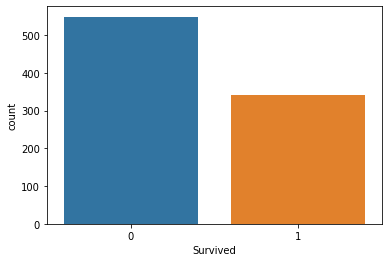

In [24]:
g1 = sb.countplot(x="Survived", data=train)

In [25]:
train[['Survived', 'Sex']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


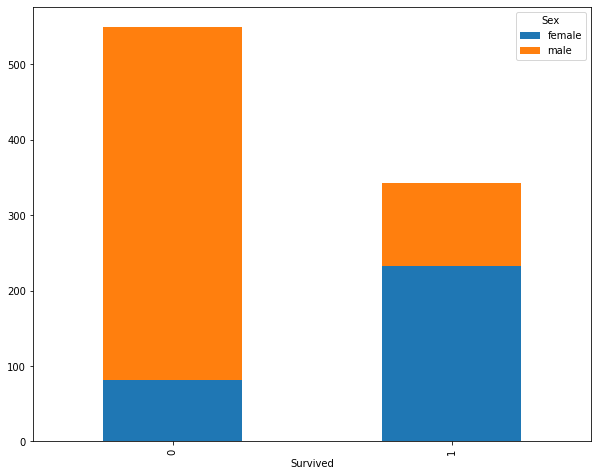

In [26]:
#0 = Not survived, 1 = survived
train.groupby(['Survived','Sex']).size().unstack().plot(kind='bar', stacked=True, figsize=(10,8))
plt.show()


#the grapgh represents that the most males did not survive

In [27]:
train[['Survived', 'Pclass']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


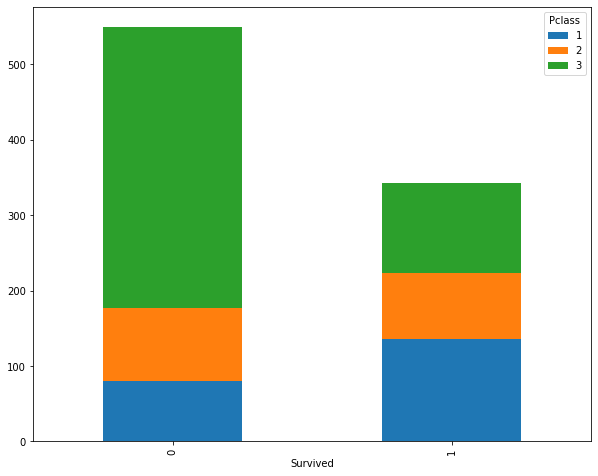

In [28]:
train.groupby(['Survived','Pclass']).size().unstack().plot(kind='bar', stacked=True , figsize=(10,8))
plt.show()

In [29]:
train[['Survived', 'Embarked']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


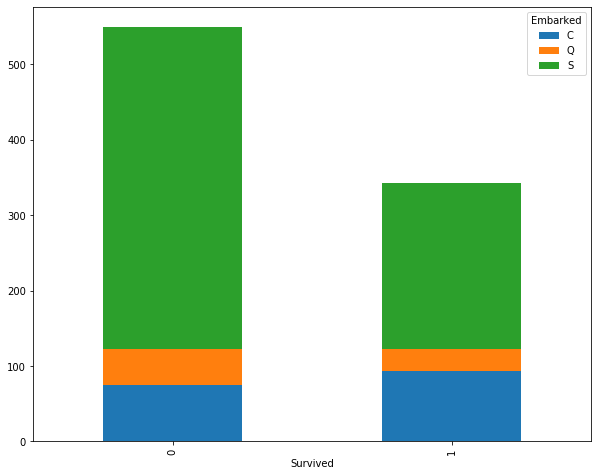

In [30]:
train.groupby(['Survived','Embarked']).size().unstack().plot(kind='bar', stacked=True, figsize=(10,8))
plt.show()

In [31]:
train[['Survived', 'SibSp']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


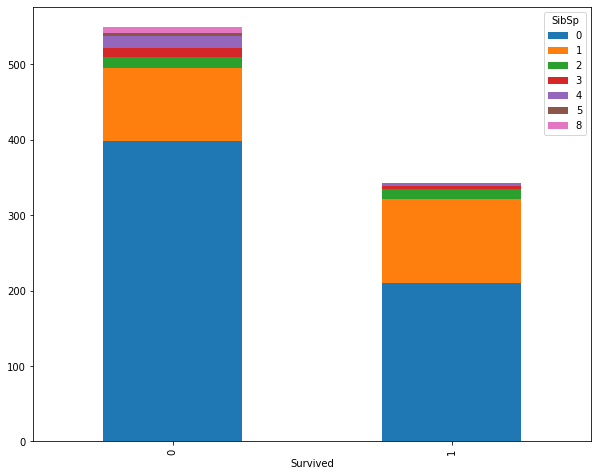

In [32]:
train.groupby(['Survived','SibSp']).size().unstack().plot(kind='bar', stacked=True, figsize=(10,8) )
plt.show()

In [33]:
train[['Survived', 'Parch']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


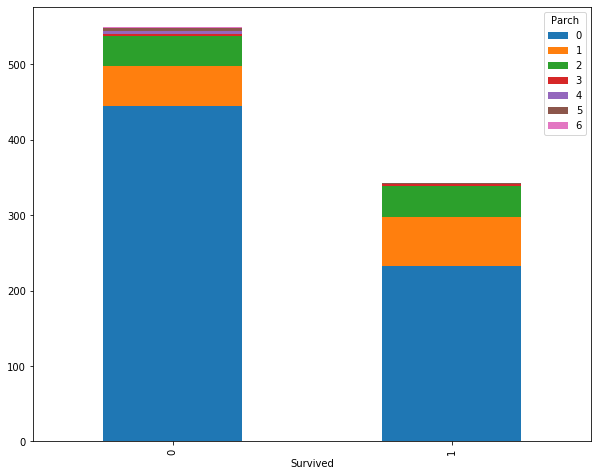

In [34]:
train.groupby(['Survived','Parch']).size().unstack().plot(kind='bar', stacked=True, figsize=(10,8) )
plt.show()

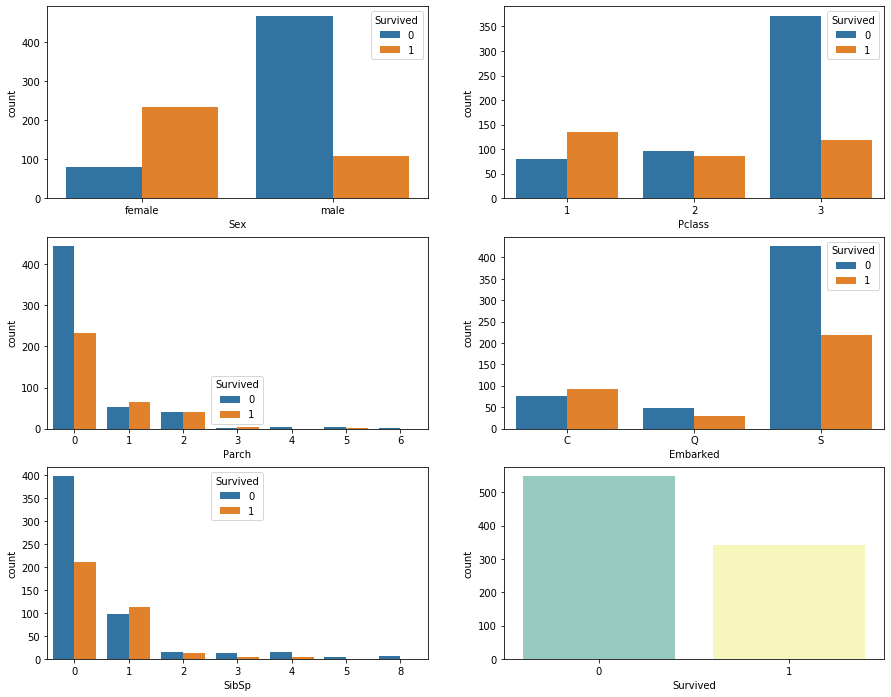

In [35]:
fig, axes = plt.subplots(nrows=3, ncols=2,figsize=(15,12))


sb.countplot(x="Sex", hue="Survived", data=train, ax=axes[0][0])
sb.countplot(x="Pclass", hue="Survived", data=train, ax=axes[0][1])
#sb.countplot(x="Survived", hue="Age", data=train, ax=axes[0][2])

sb.countplot(x="Parch", hue="Survived", data=train, ax=axes[1][0])
sb.countplot(x="Embarked", hue="Survived", data=train, ax=axes[1][1])
sb.countplot(x="SibSp", hue="Survived", data=train, ax=axes[2][0])
sb.countplot(x="Survived", data=train, ax=axes[2][1], palette="Set3")


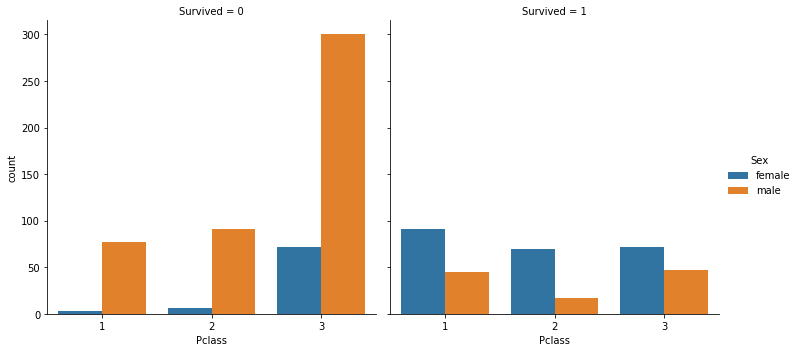

In [36]:
graph2 = sb.catplot(x="Pclass", hue="Sex", col="Survived", data=train, kind="count");

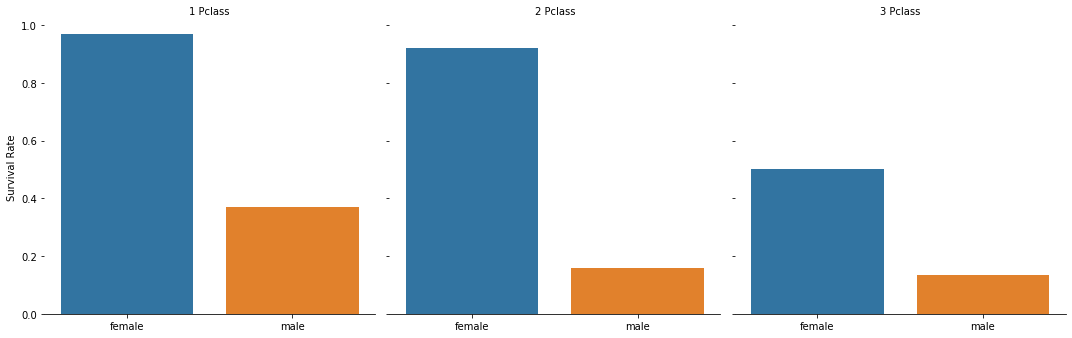

In [37]:
g = sb.catplot(x="Sex", y="Survived", col="Pclass", data=train, kind="bar", ci=None)
(g.set_axis_labels("", "Survival Rate").set_titles("{col_name} {col_var}").despine(left=True)) 

In [38]:
train['Age'].max()

80.0

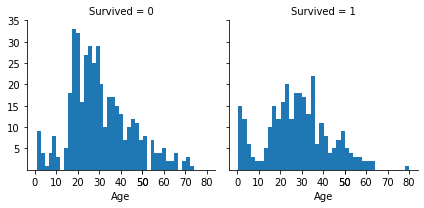

In [39]:
g = sb.FacetGrid(train, col='Survived')
(g.map(plt.hist, 'Age', bins = 40) 
 .set(xticks=[0, 10, 20, 30, 40, 50, 50, 60, 70, 80], yticks=[5, 10, 15, 20, 25, 30, 35]))


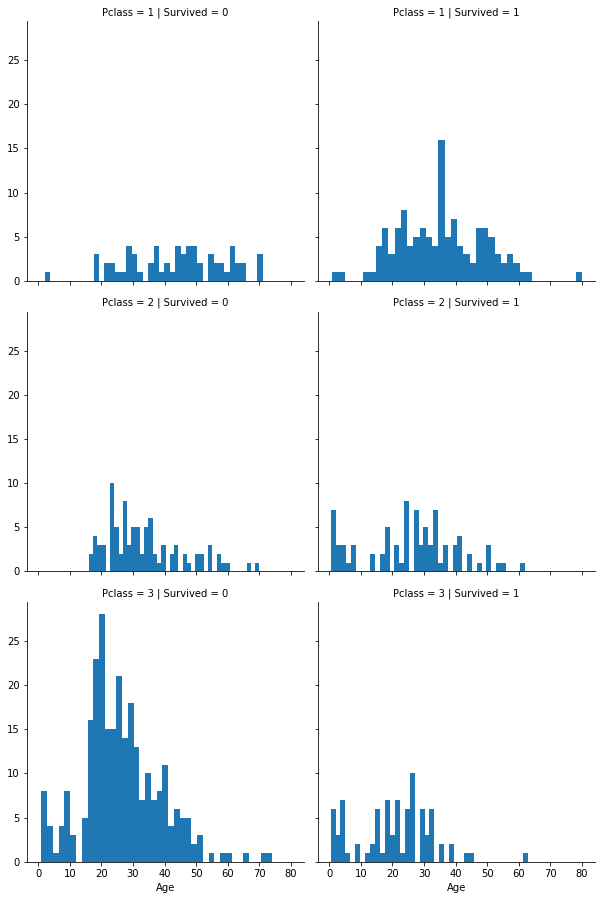

In [40]:
g = sb.FacetGrid(train, col='Survived', row='Pclass', height=4.2)
g.map(plt.hist, 'Age', bins=40)
g.add_legend();

C:\Users\usama\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\usama\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\usama\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\seaborn\axisgrid.py:720: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


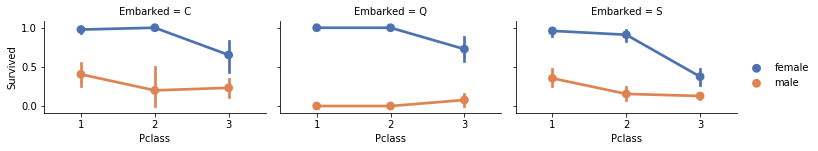

In [41]:
grid = sb.FacetGrid(train, col='Embarked',  size=2.2, aspect=1.6)
grid.map(sb.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

In [42]:
train['Fare'].max()

512.3292

C:\Users\usama\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


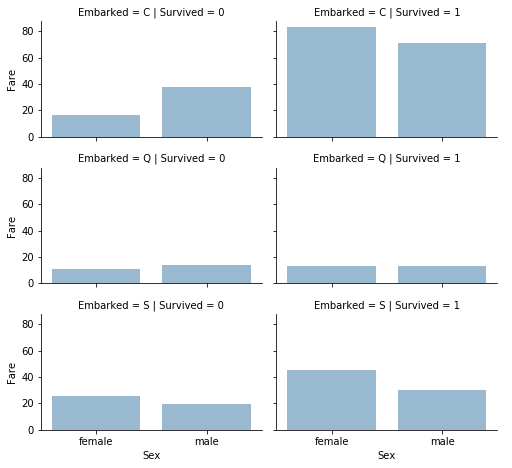

In [43]:
g = sb.FacetGrid(train, row='Embarked', col='Survived', size=2.2, aspect=1.6)
g.map(sb.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
g.add_legend()

# Dropping unused attributes

In [282]:
train_n = train.drop(['Ticket', 'Cabin'], axis = 1)

In [283]:
test_n = test.drop(['Ticket', 'Cabin'], axis = 1)

In [284]:
combine = [train_n, test_n]

In [285]:
combine

[     PassengerId  Survived Pclass  \
 0              1         0      3   
 1              2         1      1   
 2              3         1      3   
 3              4         1      1   
 4              5         0      3   
 ..           ...       ...    ...   
 886          887         0      2   
 887          888         1      1   
 888          889         0      3   
 889          890         1      1   
 890          891         0      3   
 
                                                   Name     Sex   Age  SibSp  \
 0                              Braund, Mr. Owen Harris    male  22.0      1   
 1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
 2                               Heikkinen, Miss. Laina  female  26.0      0   
 3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
 4                             Allen, Mr. William Henry    male  35.0      0   
 ..                                                 ...     ..

In [286]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract('([A-Za-z]+)\.')

pd.crosstab(train_n['Title'], train_n['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [287]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Capt', 'Col', 'Countess', 'Don', 'Dr', 'Jonkheer', 'Major', 'Rev'], 'Rare')
    dataset['Title'] = dataset['Title'].replace(['Mlle', 'Ms', 'Lady'], 'Miss')
    #dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    dataset['Title'] = dataset['Title'].replace('Sir', 'Mr')

In [288]:
train_n[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.704301
2,Mr,0.158301
3,Mrs,0.793651
4,Rare,0.285714


    Converting categorical data into ordinal by mapping

In [289]:
titleMap = {'Master': 1,  'Miss': 2, 'Mr': 3, 'Mrs': 4, 'Rare': 5}

In [290]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(titleMap)

In [291]:
train_n[600:790]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
600,601,1,2,"Jacobsohn, Mrs. Sidney Samuel (Amy Frances Chr...",female,24.0,2,1,27.0000,S,4
601,602,0,3,"Slabenoff, Mr. Petco",male,NaN,0,0,7.8958,S,3
602,603,0,1,"Harrington, Mr. Charles H",male,NaN,0,0,42.4000,S,3
603,604,0,3,"Torber, Mr. Ernst William",male,44.0,0,0,8.0500,S,3
604,605,1,1,"Homer, Mr. Harry (""Mr E Haven"")",male,35.0,0,0,26.5500,C,3
...,...,...,...,...,...,...,...,...,...,...,...
785,786,0,3,"Harmer, Mr. Abraham (David Lishin)",male,25.0,0,0,7.2500,S,3
786,787,1,3,"Sjoblom, Miss. Anna Sofia",female,18.0,0,0,7.4958,S,2
787,788,0,3,"Rice, Master. George Hugh",male,8.0,4,1,29.1250,Q,1
788,789,1,3,"Dean, Master. Bertram Vere",male,1.0,1,2,20.5750,S,1


In [292]:
train_n = train_n.drop(['Name', 'PassengerId'], axis = 1)

In [293]:
test_n = test_n.drop(['Name'], axis = 1)

In [294]:
combine = (train_n, test_n)

In [295]:
train_n.shape

(891, 9)

In [296]:
test_n.shape

(418, 9)

In [297]:
dataset

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q,3.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S,4.0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q,3.0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S,3.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S,4.0
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,8.0500,S,3.0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,108.9000,C,NaN
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,7.2500,S,3.0
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,8.0500,S,3.0


In [298]:
combine

(     Survived Pclass     Sex   Age  SibSp  Parch     Fare Embarked  Title
 0           0      3    male  22.0      1      0   7.2500        S      3
 1           1      1  female  38.0      1      0  71.2833        C      4
 2           1      3  female  26.0      0      0   7.9250        S      2
 3           1      1  female  35.0      1      0  53.1000        S      4
 4           0      3    male  35.0      0      0   8.0500        S      3
 ..        ...    ...     ...   ...    ...    ...      ...      ...    ...
 886         0      2    male  27.0      0      0  13.0000        S      5
 887         1      1  female  19.0      0      0  30.0000        S      2
 888         0      3  female   NaN      1      2  23.4500        S      2
 889         1      1    male  26.0      0      0  30.0000        C      3
 890         0      3    male  32.0      0      0   7.7500        Q      3
 
 [891 rows x 9 columns],
      PassengerId  Pclass     Sex   Age  SibSp  Parch      Fare Embarked 

In [299]:
smap = dataset['Sex']

In [300]:
smap = {'male': 1, 'female': 2}

In [301]:
smap

{'male': 1, 'female': 2}

In [302]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map(smap)

In [304]:
train_n.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,1,22.0,1,0,7.2500,S,3
1,1,1,2,38.0,1,0,71.2833,C,4
2,1,3,2,26.0,0,0,7.9250,S,2
3,1,1,2,35.0,1,0,53.1000,S,4
4,0,3,1,35.0,0,0,8.0500,S,3
